# 📊 Part 0/1: Data Exploration & DataLoader Setup
## סקירת הנתונים והכנת DataLoader ב-PyTorch

---

### 🎯 מטרות המחברת הזו:
1. **הבנת המבנה של ה-Dataset** - כמה תמונות יש, איך הן מאורגנות, מהן הקטגוריות
2. **יצירת DataLoader ב-PyTorch** - כיצד לטעון תמונות באצווה (batch) לאימון
3. **Data Augmentation** - הגדלת ה-dataset באופן מלאכותי דרך טרנספורמציות
4. **חלוקה ל-Train/Val/Test** - הפרדת הנתונים בצורה נכונה
5. **ויזואליזציה** - צפייה בתמונות ובהתפלגות המחלקות

---

### 📚 מה נלמד?
- איך PyTorch טוען תמונות מתיקיות
- מהו `Dataset` ו-`DataLoader` ב-PyTorch
- למה צריך Normalization וכיצד לבצע אותו
- מהם Transforms ואיך להגדיר Data Augmentation
- איך לחלק dataset בצורה נכונה (stratified split)

## 1️⃣ ייבוא ספריות (Import Libraries)

### 🤔 מה כל ספרייה עושה?
- **torch** - הספרייה המרכזית של PyTorch
- **torchvision** - כלים לעבודה עם תמונות (transforms, datasets, models)
- **numpy, pandas** - חישובים ועיבוד נתונים
- **matplotlib, seaborn** - ויזואליזציה
- **PIL (Pillow)** - פתיחה ועיבוד תמונות
- **sklearn** - כלים למדידת ביצועים וחלוקת datasets

## 0️⃣ התקנת ספריות (אם נדרש)

אם זו ההרצה הראשונה, הרץ את התא הבא להתקנת כל הספריות הנדרשות.
זה ייקח כמה דקות...

In [2]:
# התקנת כל הספריות הנדרשות
# הרץ תא זה פעם אחת בלבד בהתחלה

import sys
import subprocess

# רשימת הספריות להתקנה
packages = [
    'torch',
    'torchvision', 
    'numpy',
    'pandas',
    'matplotlib',
    'seaborn',
    'scikit-learn',
    'pillow',
    'tqdm',
    'ipywidgets'
]

print("🔧 מתקין ספריות... (זה ייקח 2-3 דקות)\n")

for package in packages:
    try:
        __import__(package)
        print(f"✅ {package} - כבר מותקן")
    except ImportError:
        print(f"📦 מתקין {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package, "-q"])
        print(f"✅ {package} - הותקן בהצלחה!")

print("\n🎉 כל הספריות מותקנות! אפשר להמשיך לתא הבא.")
print("💡 טיפ: אם היו שגיאות, הרץ שוב את התא הזה.")

🔧 מתקין ספריות... (זה ייקח 2-3 דקות)

📦 מתקין torch...
✅ torch - הותקן בהצלחה!
📦 מתקין torchvision...
✅ torchvision - הותקן בהצלחה!
✅ numpy - כבר מותקן
📦 מתקין pandas...
✅ pandas - הותקן בהצלחה!
📦 מתקין matplotlib...
✅ matplotlib - הותקן בהצלחה!
📦 מתקין seaborn...
✅ seaborn - הותקן בהצלחה!
📦 מתקין scikit-learn...
✅ scikit-learn - הותקן בהצלחה!
📦 מתקין pillow...
✅ pillow - הותקן בהצלחה!
📦 מתקין tqdm...
✅ tqdm - הותקן בהצלחה!
📦 מתקין ipywidgets...
✅ ipywidgets - הותקן בהצלחה!

🎉 כל הספריות מותקנות! אפשר להמשיך לתא הבא.
💡 טיפ: אם היו שגיאות, הרץ שוב את התא הזה.


In [20]:
# ייבוא ספריות בסיסיות
import os
import sys
from pathlib import Path
import random
import warnings
warnings.filterwarnings('ignore')  # להסתיר אזהרות מיותרות

# PyTorch & Torchvision
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision
from torchvision import transforms, datasets
from torchvision.datasets import ImageFolder

# Data Science
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Sklearn utilities
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Progress bar
from tqdm.notebook import tqdm

# הוספת תיקיית src ל-PATH כדי לייבא את config
sys.path.append(str(Path.cwd().parent / 'src'))
import config

print("✅ All libraries imported successfully!")
print(f"📍 PyTorch Version: {torch.__version__}")
print(f"🖥️  Device: {config.DEVICE}")

✅ All libraries imported successfully!
📍 PyTorch Version: 2.9.1+cpu
🖥️  Device: cpu


## 2️⃣ קביעת Seed לשחזוריות (Reproducibility)

### 🎲 למה צריך Seed?
רשתות עמוקות משתמשות במספרים אקראיים:
- אתחול משקולות (weights initialization)
- Data augmentation
- Dropout
- חלוקת train/val/test

**בלי Seed:** כל הרצה תיתן תוצאות שונות
**עם Seed:** תוכל לשחזר בדיוק את אותן התוצאות

In [34]:
def set_seed(seed=42):
    """
    קובע seed לכל הספריות שמשתמשות במספרים אקראיים
    זה מבטיח שנקבל תוצאות זהות בכל הרצה
    """
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    
    # אם יש GPU
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)  # אם יש יותר מ-GPU אחד
        # הגדרות נוספות לשחזוריות מלאה (עשוי להאט קצת)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False
    
    print(f"🎲 Random seed set to {seed}")

set_seed(config.RANDOM_SEED)

🎲 Random seed set to 42


## 3️⃣ סקירת מבנה ה-Dataset

### 📁 איך PyTorch מצפה שנארגן את התמונות?

PyTorch מצפה שהתמונות יהיו בפורמט:
```
data_folder/
    class_1/
        image1.jpg
        image2.jpg
        ...
    class_2/
        image1.jpg
        image2.jpg
        ...
```

בואו נבדוק שה-dataset שלנו מתאים למבנה הזה:

In [35]:
# נתיב ל-dataset
data_path = Path(config.DATA_PATH)
print(f"📂 Dataset path: {data_path}")
print(f"📊 Dataset exists: {data_path.exists()}\n")

# רשימת כל התיקיות (מחלקות)
classes = sorted([d.name for d in data_path.iterdir() if d.is_dir()])
print(f"📋 Found {len(classes)} classes:")
for i, class_name in enumerate(classes, 1):
    print(f"   {i}. {class_name}")

📂 Dataset path: c:\Users\Administrator\Desktop\Dan\Projects\waste-classifier-fastai\recycling_dataset
📊 Dataset exists: True

📋 Found 4 classes:
   1. cardboard box waste
   2. crushed aluminum can
   3. glass bottle waste
   4. plastic bottle waste


### 🔍 ספירת תמונות בכל קטגוריה

In [50]:
# ספירת קבצים בכל תיקייה
class_counts = {}

for class_name in classes:
    class_path = data_path / class_name
    # סופרים רק קבצי תמונות (jpg, jpeg, png)
    image_files = list(class_path.glob('*.jpg')) + \
                  list(class_path.glob('*.jpeg')) + \
                  list(class_path.glob('*.png'))
    class_counts[class_name] = len(image_files)

# יצירת DataFrame לתצוגה יפה
df_counts = pd.DataFrame(list(class_counts.items()), 
                         columns=['Class', 'Number of Images'])
df_counts['Percentage'] = (df_counts['Number of Images'] / df_counts['Number of Images'].sum() * 100).round(2)

print("\n📊 Dataset Statistics:")
print(df_counts.to_string(index=False))
print(f"\n🔢 Total images: {df_counts['Number of Images'].sum()}")

# האם ה-dataset מאוזן?
max_count = df_counts['Number of Images'].max()
min_count = df_counts['Number of Images'].min()
imbalance_ratio = max_count / min_count

print(f"\n⚖️  Dataset Balance:")
if imbalance_ratio < 1.5:
    print(f"   ✅ Well balanced (ratio: {imbalance_ratio:.2f})")
elif imbalance_ratio < 3:
    print(f"   ⚠️  Moderately imbalanced (ratio: {imbalance_ratio:.2f})")
else:
    print(f"   ❌ Highly imbalanced (ratio: {imbalance_ratio:.2f})")
    print("   💡 Tip: Consider using class weights in loss function")


📊 Dataset Statistics:
               Class  Number of Images  Percentage
 cardboard box waste               478       22.82
crushed aluminum can               496       23.68
  glass bottle waste               570       27.21
plastic bottle waste               551       26.30

🔢 Total images: 2095

⚖️  Dataset Balance:
   ✅ Well balanced (ratio: 1.19)


### 📊 ויזואליזציה של התפלגות המחלקות

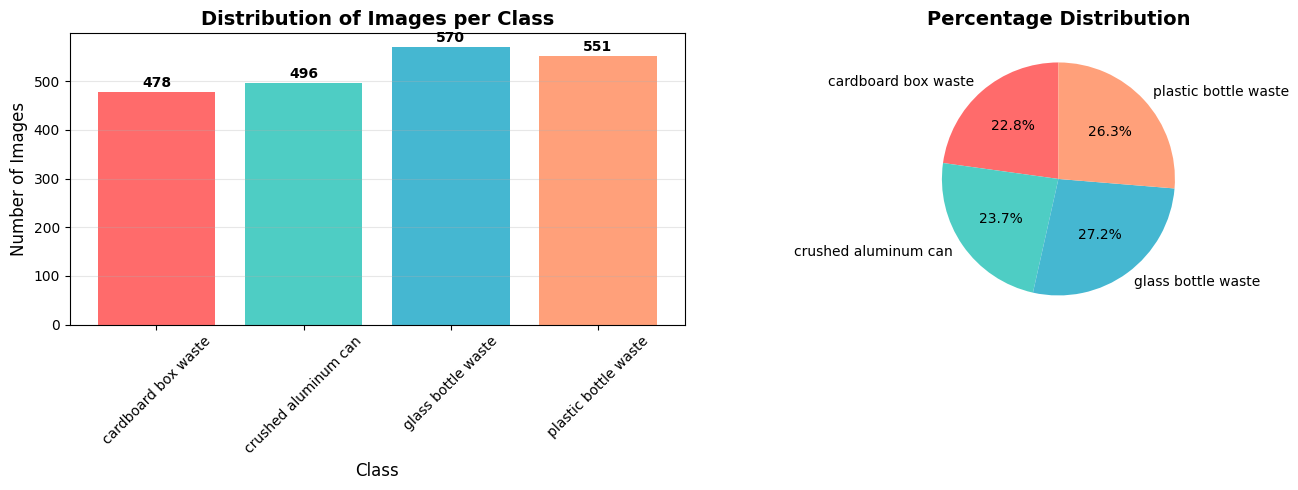

💾 Plot saved to: c:\Users\Administrator\Desktop\Dan\Projects\waste-classifier-fastai\final_project\results\plots\01_dataset_distribution.png


In [51]:
# יצירת 2 גרפים: bar chart ו-pie chart
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar Chart
axes[0].bar(df_counts['Class'], df_counts['Number of Images'], 
            color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
axes[0].set_xlabel('Class', fontsize=12)
axes[0].set_ylabel('Number of Images', fontsize=12)
axes[0].set_title('Distribution of Images per Class', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# הוספת מספרים על העמודות
for i, (cls, count) in enumerate(zip(df_counts['Class'], df_counts['Number of Images'])):
    axes[0].text(i, count + 5, str(count), ha='center', va='bottom', fontweight='bold')

# Pie Chart
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
axes[1].pie(df_counts['Number of Images'], labels=df_counts['Class'], 
            autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('Percentage Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(config.PLOTS_DIR / '01_dataset_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("💾 Plot saved to:", config.PLOTS_DIR / '01_dataset_distribution.png')

## 4️⃣ בדיקת גודל תמונות

### 📐 למה חשוב לדעת את גדלי התמונות?
- רשתות CNN דורשות input בגודל קבוע
- תמונות גדולות מדי → יותר זיכרון, אימון איטי יותר
- תמונות קטנות מדי → אובדן פרטים חשובים

In [52]:
# בדיקת גדלי תמונות (נבדוק מדגם של 50 תמונות מכל קטגוריה)
image_sizes = []

print("🔍 Analyzing image sizes (sampling 50 images per class)...\n")

for class_name in classes:
    class_path = data_path / class_name
    image_files = list(class_path.glob('*.jpg')) + \
                  list(class_path.glob('*.jpeg')) + \
                  list(class_path.glob('*.png'))
    
    # בוחרים מדגם אקראי
    sample_files = random.sample(image_files, min(50, len(image_files)))
    
    for img_path in sample_files:
        with Image.open(img_path) as img:
            width, height = img.size
            image_sizes.append({
                'class': class_name,
                'width': width,
                'height': height,
                'aspect_ratio': width / height
            })

df_sizes = pd.DataFrame(image_sizes)

print("📊 Image Size Statistics:")
print(f"   Average width:  {df_sizes['width'].mean():.0f} px")
print(f"   Average height: {df_sizes['height'].mean():.0f} px")
print(f"   Min dimensions: {df_sizes['width'].min():.0f} x {df_sizes['height'].min():.0f}")
print(f"   Max dimensions: {df_sizes['width'].max():.0f} x {df_sizes['height'].max():.0f}")
print(f"   Average aspect ratio: {df_sizes['aspect_ratio'].mean():.2f}")

print(f"\n✅ All images will be resized to {config.IMAGE_SIZE}x{config.IMAGE_SIZE} for training")

🔍 Analyzing image sizes (sampling 50 images per class)...

📊 Image Size Statistics:
   Average width:  621 px
   Average height: 479 px
   Min dimensions: 400 x 225
   Max dimensions: 1920 x 1690
   Average aspect ratio: 1.33

✅ All images will be resized to 224x224 for training


## 5️⃣ הצגת דוגמאות תמונות

### 👁️ בואו נראה את התמונות שלנו!

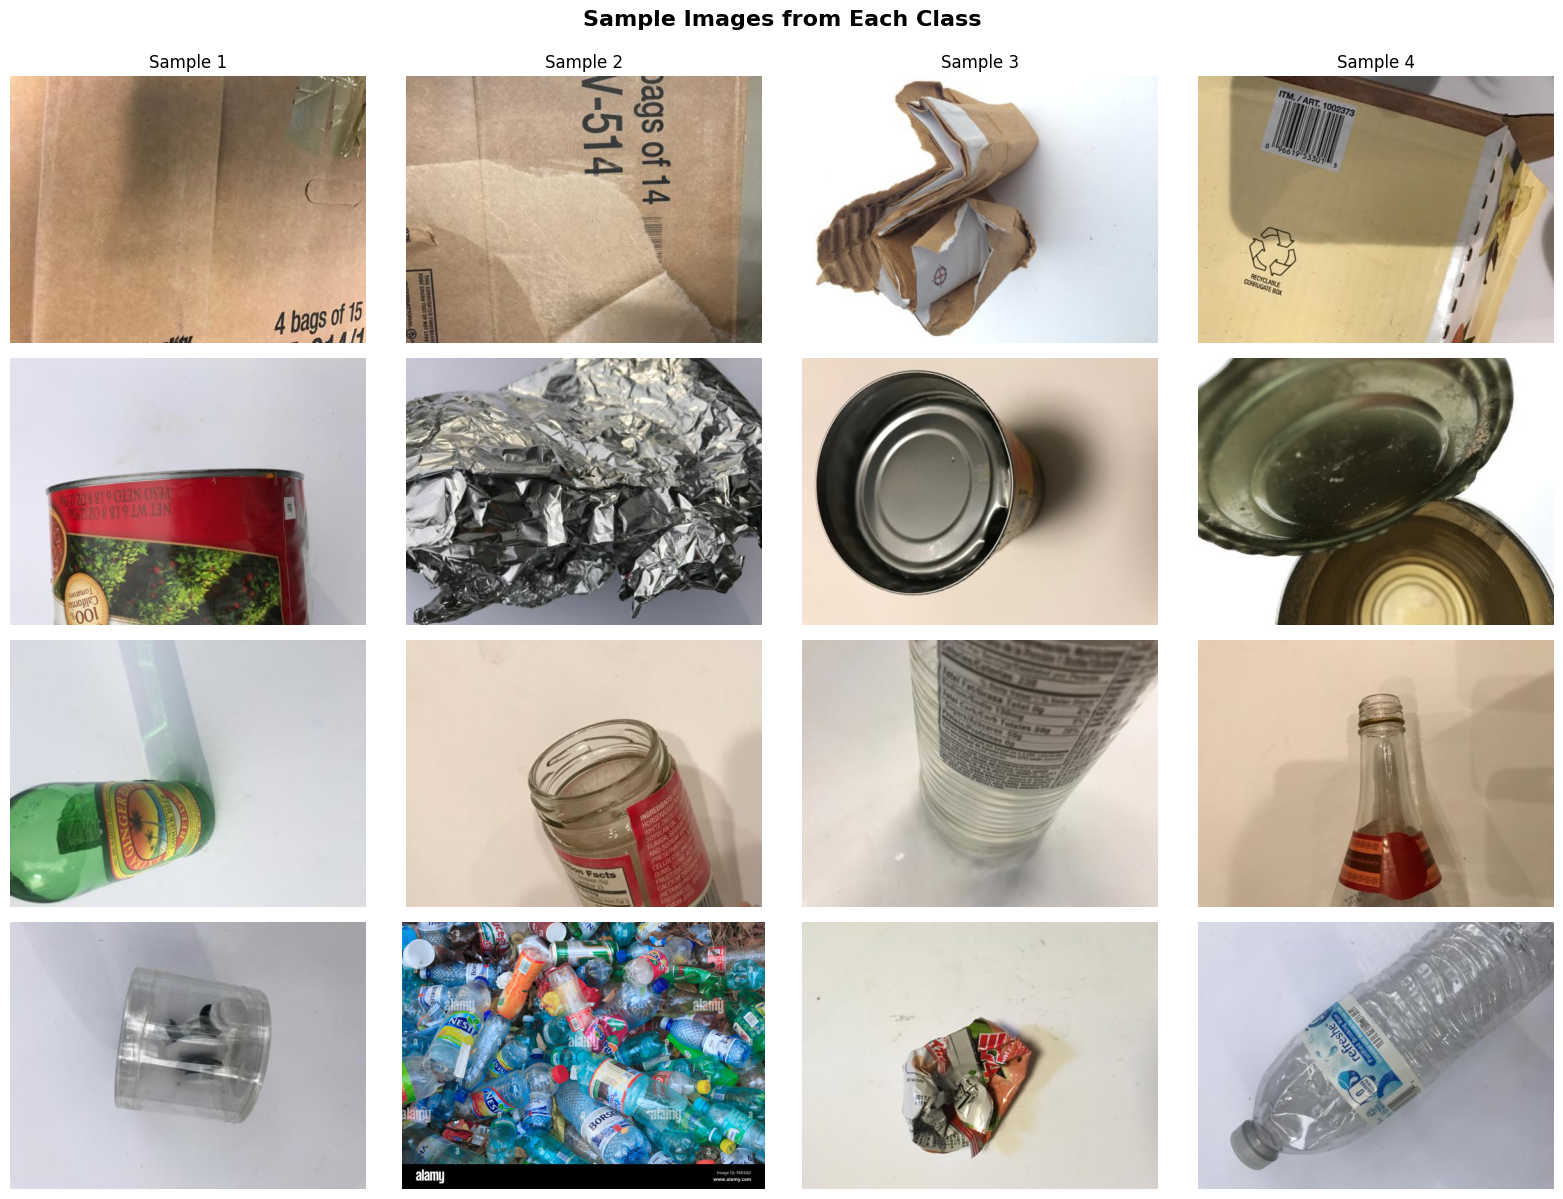

💾 Sample images saved to: c:\Users\Administrator\Desktop\Dan\Projects\waste-classifier-fastai\final_project\results\plots\02_sample_images.png


In [53]:
def show_sample_images(data_path, classes, num_images=4):
    """
    מציג מדגם תמונות מכל קטגוריה
    
    Args:
        data_path: נתיב לתיקיית הנתונים
        classes: רשימת שמות הקטגוריות
        num_images: כמה תמונות להציג מכל קטגוריה
    """
    fig, axes = plt.subplots(len(classes), num_images, figsize=(16, 12))
    
    for i, class_name in enumerate(classes):
        class_path = data_path / class_name
        image_files = list(class_path.glob('*.jpg')) + \
                      list(class_path.glob('*.jpeg')) + \
                      list(class_path.glob('*.png'))
        
        # בחירת תמונות אקראיות
        sample_files = random.sample(image_files, min(num_images, len(image_files)))
        
        for j, img_path in enumerate(sample_files):
            img = Image.open(img_path)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            
            # כותרת רק בשורה הראשונה
            if i == 0:
                axes[i, j].set_title(f'Sample {j+1}', fontsize=12)
            
            # שם הקטגוריה בעמודה הראשונה
            if j == 0:
                axes[i, j].set_ylabel(class_name, fontsize=11, rotation=0, 
                                       ha='right', va='center', labelpad=50)
    
    plt.suptitle('Sample Images from Each Class', fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.savefig(config.PLOTS_DIR / '02_sample_images.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("💾 Sample images saved to:", config.PLOTS_DIR / '02_sample_images.png')

show_sample_images(data_path, classes)

## 6️⃣ הגדרת Transforms - טרנספורמציות על התמונות

### 🔄 מהם Transforms?
Transforms הם פעולות שמבוצעות על התמונות לפני שהן נכנסות לרשת:

#### **Transforms בסיסיים (חובה):**
1. **Resize** - שינוי גודל לגודל קבוע (224x224)
2. **ToTensor** - המרה ל-Tensor של PyTorch
3. **Normalize** - נרמול הפיקסלים לטווח מסוים

#### **Data Augmentation (רק ל-Train):**
- **RandomHorizontalFlip** - היפוך אופקי אקראי
- **RandomRotation** - סיבוב אקראי
- **ColorJitter** - שינוי בהירות, ניגודיות, רוויה
- **RandomCrop** - חיתוך אקראי

### 🤔 למה Normalization?
נרמול גורם לרשת ללמוד מהר יותר ויציב יותר.

**ערכי הנרמול הסטנדרטיים של ImageNet:**
- Mean: [0.485, 0.456, 0.406] (ממוצע לכל ערוץ RGB)
- Std: [0.229, 0.224, 0.225] (סטיית תקן לכל ערוץ)

In [54]:
# ערכי נרמול סטנדרטיים של ImageNet
# (אלה הערכים שבהם אומנו רוב המודלים הידועים)
IMAGENET_MEAN = [0.485, 0.456, 0.406]
IMAGENET_STD = [0.229, 0.224, 0.225]

# Transforms לאימון (עם Data Augmentation)
train_transforms = transforms.Compose([
    # 1. שינוי גודל לגודל קצת יותר גדול (כדי שנוכל לחתוך)
    transforms.Resize((config.IMAGE_SIZE + 32, config.IMAGE_SIZE + 32)),
    
    # 2. חיתוך אקראי לגודל הסופי (Data Augmentation)
    transforms.RandomCrop((config.IMAGE_SIZE, config.IMAGE_SIZE)),
    
    # 3. היפוך אופקי אקראי עם הסתברות 50%
    transforms.RandomHorizontalFlip(p=config.AUGMENTATION_PARAMS['horizontal_flip_prob']),
    
    # 4. סיבוב אקראי
    transforms.RandomRotation(degrees=config.AUGMENTATION_PARAMS['rotation_degrees']),
    
    # 5. שינוי בהירות וניגודיות
    transforms.ColorJitter(
        brightness=config.AUGMENTATION_PARAMS['brightness'],
        contrast=config.AUGMENTATION_PARAMS['contrast']
    ),
    
    # 6. המרה ל-Tensor (0-255 → 0.0-1.0)
    transforms.ToTensor(),
    
    # 7. נרמול לפי ערכי ImageNet
    transforms.Normalize(mean=IMAGENET_MEAN, std=IMAGENET_STD)
])

# Transforms לוולידציה וטסט (ללא Data Augmentation!)
val_test_transforms = transforms.Compose([
    # 1. שינוי גודל
    transforms.Resize((config.IMAGE_SIZE, config.IMAGE_SIZE)),
    
    # 2. המרה ל-Tensor
    transforms.ToTensor(),
    
    # 3. נרמול
    transforms.Normalize(mean=IMAGENET_MEAN, std=IMAGENET_STD)
])

print("✅ Transforms defined successfully!")
print("\n📋 Train transforms (with augmentation):")
print(train_transforms)
print("\n📋 Validation/Test transforms (no augmentation):")
print(val_test_transforms)

✅ Transforms defined successfully!

📋 Train transforms (with augmentation):
Compose(
    Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
    RandomCrop(size=(224, 224), padding=None)
    RandomHorizontalFlip(p=0.5)
    RandomRotation(degrees=[-20.0, 20.0], interpolation=nearest, expand=False, fill=0)
    ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=None, hue=None)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

📋 Validation/Test transforms (no augmentation):
Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


### 👀 ויזואליזציה של Data Augmentation

בואו נראה מה ה-augmentation עושה לתמונה אחת:

🖼️  Using sample image from: crushed aluminum can


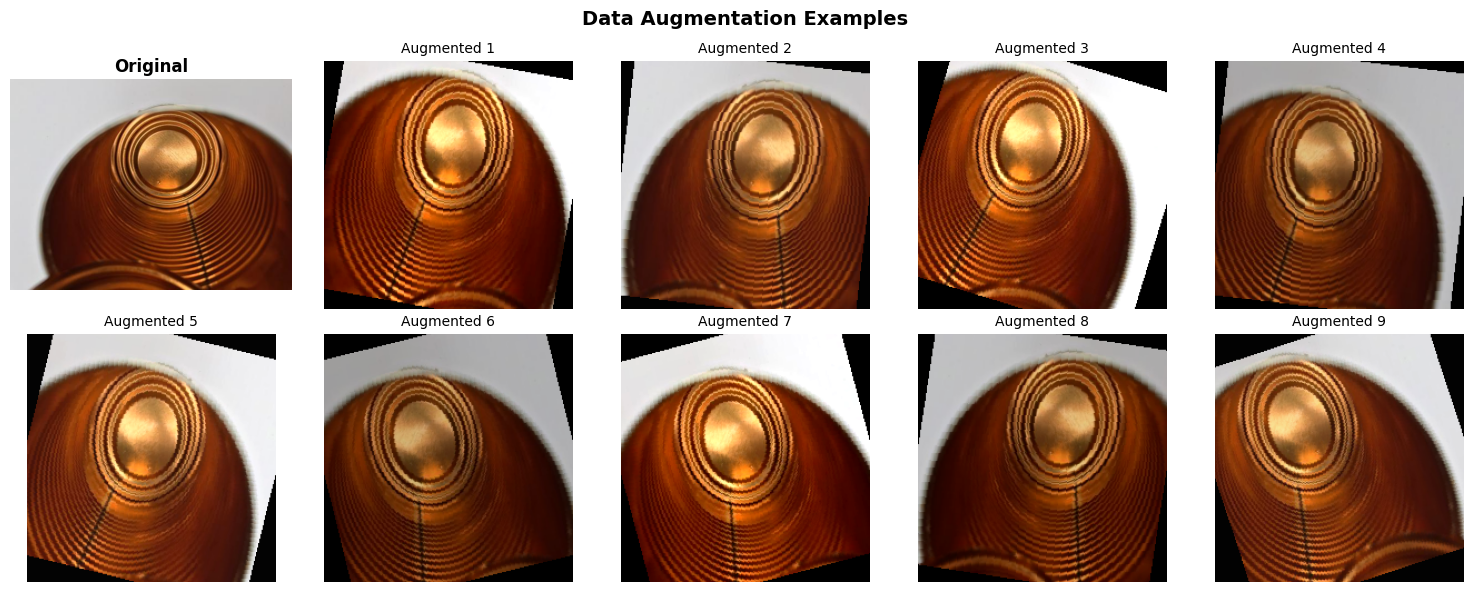

💾 Augmentation examples saved to: c:\Users\Administrator\Desktop\Dan\Projects\waste-classifier-fastai\final_project\results\plots\03_augmentation_examples.png


In [55]:
def visualize_augmentation(image_path, transform, num_samples=8):
    """
    מציג תמונה מקורית + גרסאות augmented שלה
    
    Args:
        image_path: נתיב לתמונה
        transform: ה-transform להחיל
        num_samples: כמה גרסאות augmented להציג
    """
    # טעינת התמונה המקורית
    original_img = Image.open(image_path)
    
    # יצירת subplot
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    
    # תמונה מקורית
    axes[0, 0].imshow(original_img)
    axes[0, 0].set_title('Original', fontweight='bold')
    axes[0, 0].axis('off')
    
    # גרסאות augmented
    for idx in range(1, 10):
        row = idx // 5
        col = idx % 5
        
        # החלת transform (ללא normalize כדי שנוכל להציג)
        # נשתמש רק בחלק של ה-augmentation
        aug_transform = transforms.Compose([
            transforms.Resize((config.IMAGE_SIZE + 32, config.IMAGE_SIZE + 32)),
            transforms.RandomCrop((config.IMAGE_SIZE, config.IMAGE_SIZE)),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomRotation(degrees=20),
            transforms.ColorJitter(brightness=0.2, contrast=0.2)
        ])
        
        augmented_img = aug_transform(original_img)
        
        axes[row, col].imshow(augmented_img)
        axes[row, col].set_title(f'Augmented {idx}', fontsize=10)
        axes[row, col].axis('off')
    
    plt.suptitle('Data Augmentation Examples', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig(config.PLOTS_DIR / '03_augmentation_examples.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("💾 Augmentation examples saved to:", config.PLOTS_DIR / '03_augmentation_examples.png')

# בחירת תמונה אקראית להדגמה
sample_class = random.choice(classes)
sample_image = random.choice(list((data_path / sample_class).glob('*.jpg')))

print(f"🖼️  Using sample image from: {sample_class}")
visualize_augmentation(sample_image, train_transforms)

## 7️⃣ יצירת Dataset ו-DataLoader

### 🎯 מהו Dataset ב-PyTorch?
`Dataset` הוא אובייקט שיודע איך לטעון את הנתונים.
הוא חייב לממש 2 פונקציות:
- `__len__()` - מחזיר כמה דוגמאות יש
- `__getitem__(idx)` - מחזיר את הדוגמה במיקום idx

### 🎯 מהו DataLoader?
`DataLoader` לוקח Dataset ויוצר batches:
- טוען תמונות באצווה (batch)
- מערבב (shuffle) את הנתונים
- יכול לטעון במקביל (multi-threading)

### 📊 חלוקה ל-Train/Val/Test
- **Train (70%)** - לאימון המודל
- **Validation (15%)** - לבחירת hyperparameters ומניעת overfitting
- **Test (15%)** - לבדיקה סופית (לא נגע בזה עד הסוף!)

In [56]:
# טעינת כל ה-dataset (בלי transforms עדיין)
full_dataset = ImageFolder(root=str(data_path))

print(f"📊 Total images in dataset: {len(full_dataset)}")
print(f"🏷️  Classes: {full_dataset.classes}")
print(f"🔢 Class to index mapping: {full_dataset.class_to_idx}")

# חישוב גדלים של train/val/test
total_size = len(full_dataset)
train_size = int(config.TRAIN_SPLIT * total_size)
val_size = int(config.VAL_SPLIT * total_size)
test_size = total_size - train_size - val_size

print(f"\n📈 Dataset split:")
print(f"   Train: {train_size} images ({config.TRAIN_SPLIT*100:.0f}%)")
print(f"   Val:   {val_size} images ({config.VAL_SPLIT*100:.0f}%)")
print(f"   Test:  {test_size} images ({config.TEST_SPLIT*100:.0f}%)")

📊 Total images in dataset: 2095
🏷️  Classes: ['cardboard box waste', 'crushed aluminum can', 'glass bottle waste', 'plastic bottle waste']
🔢 Class to index mapping: {'cardboard box waste': 0, 'crushed aluminum can': 1, 'glass bottle waste': 2, 'plastic bottle waste': 3}

📈 Dataset split:
   Train: 1466 images (70%)
   Val:   314 images (15%)
   Test:  315 images (15%)


### ⚠️ בעיה: random_split לא שומר על איזון מחלקות!

אם נשתמש ב-`random_split` רגיל, אנחנו עלולים לקבל:
- Train עם הרבה מקטגוריה אחת
- Val עם מעט מקטגוריה אחרת

**פתרון:** Stratified Split - מבטיח שכל split שומר על אותה התפלגות של מחלקות

In [57]:
def stratified_split_dataset(dataset, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, seed=42):
    """
    מחלק dataset לשלושה חלקים תוך שמירה על התפלגות המחלקות
    
    Args:
        dataset: ImageFolder dataset
        train_ratio: אחוז לאימון
        val_ratio: אחוז לוולידציה
        test_ratio: אחוז לטסט
        seed: random seed
    
    Returns:
        train_indices, val_indices, test_indices
    """
    # קבלת כל ה-labels
    labels = [label for _, label in dataset.samples]
    indices = list(range(len(dataset)))
    
    # חלוקה ראשונה: train vs (val+test)
    train_indices, temp_indices = train_test_split(
        indices,
        test_size=(val_ratio + test_ratio),
        stratify=[labels[i] for i in indices],
        random_state=seed
    )
    
    # חלוקה שנייה: val vs test
    val_test_ratio = test_ratio / (val_ratio + test_ratio)
    val_indices, test_indices = train_test_split(
        temp_indices,
        test_size=val_test_ratio,
        stratify=[labels[i] for i in temp_indices],
        random_state=seed
    )
    
    return train_indices, val_indices, test_indices

# ביצוע החלוקה
train_indices, val_indices, test_indices = stratified_split_dataset(
    full_dataset,
    train_ratio=config.TRAIN_SPLIT,
    val_ratio=config.VAL_SPLIT,
    test_ratio=config.TEST_SPLIT,
    seed=config.RANDOM_SEED
)

print("\n✅ Stratified split completed!")
print(f"   Train indices: {len(train_indices)}")
print(f"   Val indices: {len(val_indices)}")
print(f"   Test indices: {len(test_indices)}")


✅ Stratified split completed!
   Train indices: 1466
   Val indices: 314
   Test indices: 315


### ✅ בדיקת החלוקה - האם המחלקות מאוזנות?

In [58]:
def check_split_distribution(dataset, train_idx, val_idx, test_idx):
    """
    בודק את התפלגות המחלקות בכל split
    """
    def count_classes(indices):
        labels = [dataset.samples[i][1] for i in indices]
        return pd.Series(labels).value_counts().sort_index()
    
    train_counts = count_classes(train_idx)
    val_counts = count_classes(val_idx)
    test_counts = count_classes(test_idx)
    
    # יצירת DataFrame
    df = pd.DataFrame({
        'Class': dataset.classes,
        'Train': train_counts.values,
        'Val': val_counts.values,
        'Test': test_counts.values
    })
    
    df['Total'] = df['Train'] + df['Val'] + df['Test']
    df['Train %'] = (df['Train'] / df['Total'] * 100).round(1)
    df['Val %'] = (df['Val'] / df['Total'] * 100).round(1)
    df['Test %'] = (df['Test'] / df['Total'] * 100).round(1)
    
    return df

distribution_df = check_split_distribution(full_dataset, train_indices, val_indices, test_indices)

print("\n📊 Class Distribution Across Splits:")
print(distribution_df.to_string(index=False))

print("\n💡 Ideally, all percentages should be close to 70/15/15")


📊 Class Distribution Across Splits:
               Class  Train  Val  Test  Total  Train %  Val %  Test %
 cardboard box waste    334   72    72    478     69.9   15.1    15.1
crushed aluminum can    347   75    74    496     70.0   15.1    14.9
  glass bottle waste    399   85    86    570     70.0   14.9    15.1
plastic bottle waste    386   82    83    551     70.1   14.9    15.1

💡 Ideally, all percentages should be close to 70/15/15


## 8️⃣ יצירת DataLoaders עם Transforms

### 🔧 עכשיו נחבר הכל ביחד:
1. Dataset מחולק (train/val/test)
2. Transforms שונים לכל אחד
3. DataLoaders שטוענים batches

In [59]:
from torch.utils.data import Subset

# יצירת datasets עם transforms מתאימים
# שימו לב: צריך ליצור 3 ImageFolder נפרדים עם transforms שונים

# Train dataset (עם augmentation)
train_dataset_full = ImageFolder(root=str(data_path), transform=train_transforms)
train_dataset = Subset(train_dataset_full, train_indices)

# Val dataset (ללא augmentation)
val_dataset_full = ImageFolder(root=str(data_path), transform=val_test_transforms)
val_dataset = Subset(val_dataset_full, val_indices)

# Test dataset (ללא augmentation)
test_dataset_full = ImageFolder(root=str(data_path), transform=val_test_transforms)
test_dataset = Subset(test_dataset_full, test_indices)

print(f"✅ Datasets created:")
print(f"   Train: {len(train_dataset)} images (with augmentation)")
print(f"   Val:   {len(val_dataset)} images (no augmentation)")
print(f"   Test:  {len(test_dataset)} images (no augmentation)")

✅ Datasets created:
   Train: 1466 images (with augmentation)
   Val:   314 images (no augmentation)
   Test:  315 images (no augmentation)


In [60]:
# יצירת DataLoaders
train_loader = DataLoader(
    train_dataset,
    batch_size=config.BATCH_SIZE,
    shuffle=True,  # ערבוב בכל epoch (חשוב לאימון!)
    num_workers=2,  # כמה threads לטעינת נתונים (2-4 בדרך כלל מספיק)
    pin_memory=True if torch.cuda.is_available() else False  # מאיץ העברה ל-GPU
)

val_loader = DataLoader(
    val_dataset,
    batch_size=config.BATCH_SIZE,
    shuffle=False,  # לא צריך לערבב validation
    num_workers=2,
    pin_memory=True if torch.cuda.is_available() else False
)

test_loader = DataLoader(
    test_dataset,
    batch_size=config.BATCH_SIZE,
    shuffle=False,  # לא צריך לערבב test
    num_workers=2,
    pin_memory=True if torch.cuda.is_available() else False
)

print("\n✅ DataLoaders created successfully!")
print(f"   Train batches: {len(train_loader)} (total {len(train_dataset)} images)")
print(f"   Val batches:   {len(val_loader)} (total {len(val_dataset)} images)")
print(f"   Test batches:  {len(test_loader)} (total {len(test_dataset)} images)")
print(f"   Batch size: {config.BATCH_SIZE}")


✅ DataLoaders created successfully!
   Train batches: 46 (total 1466 images)
   Val batches:   10 (total 314 images)
   Test batches:  10 (total 315 images)
   Batch size: 32


## 9️⃣ בדיקת DataLoader - האם הוא עובד?

### 🧪 בואו נטעון batch אחד ונראה מה קיבלנו

In [61]:
# טעינת batch אחד
images, labels = next(iter(train_loader))

print(f"📦 Batch loaded successfully!")
print(f"   Images shape: {images.shape}")  # [batch_size, channels, height, width]
print(f"   Labels shape: {labels.shape}")  # [batch_size]
print(f"   Images dtype: {images.dtype}")
print(f"   Labels dtype: {labels.dtype}")
print(f"\n   Pixel value range: [{images.min():.3f}, {images.max():.3f}]")
print(f"   (After normalization - זה תקין!)")

# הדפסת labels
print(f"\n🏷️  Labels in this batch:")
for i, label in enumerate(labels[:8]):  # רק 8 הראשונים
    class_name = full_dataset.classes[label]
    print(f"   Image {i+1}: {class_name} (index: {label})")

📦 Batch loaded successfully!
   Images shape: torch.Size([32, 3, 224, 224])
   Labels shape: torch.Size([32])
   Images dtype: torch.float32
   Labels dtype: torch.int64

   Pixel value range: [-2.118, 2.640]
   (After normalization - זה תקין!)

🏷️  Labels in this batch:
   Image 1: crushed aluminum can (index: 1)
   Image 2: plastic bottle waste (index: 3)
   Image 3: glass bottle waste (index: 2)
   Image 4: crushed aluminum can (index: 1)
   Image 5: plastic bottle waste (index: 3)
   Image 6: plastic bottle waste (index: 3)
   Image 7: glass bottle waste (index: 2)
   Image 8: plastic bottle waste (index: 3)


### 👁️ ויזואליזציה של batch

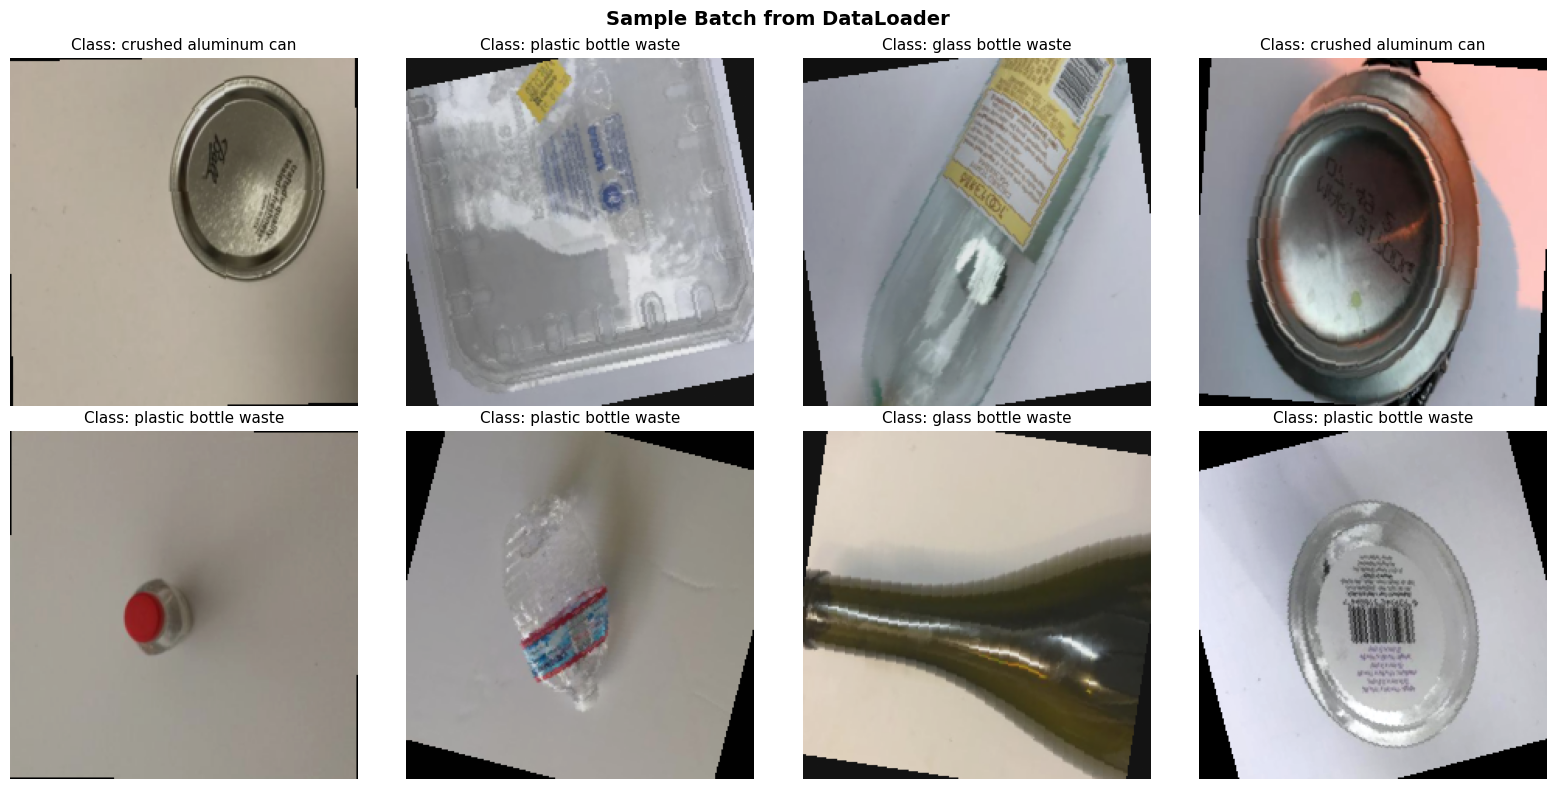

💾 Batch visualization saved to: c:\Users\Administrator\Desktop\Dan\Projects\waste-classifier-fastai\final_project\results\plots\04_dataloader_batch.png


In [62]:
def denormalize(tensor, mean=IMAGENET_MEAN, std=IMAGENET_STD):
    """
    מבטל את הנרמול כדי שנוכל להציג את התמונה
    
    Normalization עשתה: (x - mean) / std
    אז צריך לעשות: x * std + mean
    """
    mean = torch.tensor(mean).view(3, 1, 1)
    std = torch.tensor(std).view(3, 1, 1)
    return tensor * std + mean

def show_batch(images, labels, classes, num_images=8):
    """
    מציג batch של תמונות עם ה-labels שלהן
    """
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    axes = axes.flatten()
    
    for idx in range(min(num_images, len(images))):
        # ביטול נרמול
        img = denormalize(images[idx])
        # המרה ל-numpy ו-transpose מ-[C,H,W] ל-[H,W,C]
        img = img.numpy().transpose((1, 2, 0))
        # clip לטווח [0,1]
        img = np.clip(img, 0, 1)
        
        axes[idx].imshow(img)
        axes[idx].set_title(f'Class: {classes[labels[idx]]}', fontsize=11)
        axes[idx].axis('off')
    
    plt.suptitle('Sample Batch from DataLoader', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig(config.PLOTS_DIR / '04_dataloader_batch.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("💾 Batch visualization saved to:", config.PLOTS_DIR / '04_dataloader_batch.png')

show_batch(images, labels, full_dataset.classes)

## 🔟 שמירת DataLoaders לשימוש במחברות הבאות

### 💾 נשמור את ה-splits (indices) כדי שנוכל לשחזר אותם

In [63]:
import json

# שמירת indices
splits_dict = {
    'train_indices': train_indices,
    'val_indices': val_indices,
    'test_indices': test_indices,
    'class_names': full_dataset.classes,
    'class_to_idx': full_dataset.class_to_idx,
    'num_classes': len(full_dataset.classes)
}

splits_path = config.RESULTS_DIR / 'dataset_splits.json'
with open(splits_path, 'w') as f:
    json.dump(splits_dict, f, indent=2)

print(f"💾 Dataset splits saved to: {splits_path}")
print("\n✅ You can now load these splits in other notebooks!")

💾 Dataset splits saved to: c:\Users\Administrator\Desktop\Dan\Projects\waste-classifier-fastai\final_project\results\dataset_splits.json

✅ You can now load these splits in other notebooks!


## 📝 סיכום - מה עשינו במחברת הזו?

### ✅ השלמנו:
1. **סקירת Dataset** - בדקנו כמה תמונות יש, מה הקטגוריות, והתפלגות המחלקות
2. **Transforms** - הגדרנו טרנספורמציות לאימון (עם augmentation) ול-validation/test
3. **Stratified Split** - חילקנו את ה-dataset ל-train/val/test תוך שמירה על איזון מחלקות
4. **DataLoaders** - יצרנו DataLoaders שיודעים לטעון batches ביעילות
5. **ויזואליזציה** - ראינו את התמונות ואת ה-augmentation
6. **שמירה** - שמרנו את ה-splits לשימוש חוזר

### 📊 מספרים:
- **Total images:** ~1000 (תלוי בdataset שלך)
- **Classes:** 4 (cardboard, aluminum, glass, plastic)
- **Image size:** 224x224
- **Batch size:** 32
- **Train/Val/Test:** 70/15/15

### 🎓 מה למדנו?
- איך PyTorch טוען תמונות
- מהם Dataset ו-DataLoader
- למה נרמול חשוב
- איך עובד Data Augmentation
- למה Stratified Split חשוב

---

## 🚀 הצעד הבא:
במחברת הבאה ([02_cnn_from_scratch.ipynb](02_cnn_from_scratch.ipynb)) נתחיל לבנות את המודל הראשון שלנו!

---

### 💡 שאלות הבנה:
1. למה אנחנו משתמשים ב-augmentation רק ב-train ולא ב-validation?
2. מה ההבדל בין Dataset ל-DataLoader?
3. למה אנחנו עושים נרמול עם ערכי ImageNet?
4. מה יקרה אם נשכח לעשות shuffle ב-train_loader?

<details>
  <summary>💡 תשובות (לחץ להצגה)</summary>
  
  1. **Augmentation רק ב-train:** כדי שה-validation יייצג נתונים "אמיתיים" וניתן יהיה להעריך ביצועים אובייקטיביים.
  
  2. **Dataset vs DataLoader:**
     - Dataset: יודע איך לטעון דוגמה בודדת
     - DataLoader: יוצר batches, עושה shuffle, מטפל ב-threading
  
  3. **נרמול ImageNet:** מודלים מאומנים מראש (ResNet, VGG) אומנו עם הערכים האלה. שימוש באותם ערכים עוזר ל-transfer learning.
  
  4. **ללא shuffle:** המודל יראה את הדוגמאות באותו סדר בכל epoch, מה שעלול לגרום לאימון פחות יעיל.
</details>